In [46]:
import pandas as pd

# Nombre del archivo CSV
archivo_csv = "carretera_info.csv"

# Lee el archivo CSV ubicado en el directorio "../../Datos/"
# Utiliza la codificación 'latin1'
df_vial = pd.read_csv("../../Datos/" + archivo_csv, encoding='latin1')

# Omitir las columnas categóricas o de tipo string
columnas_a_omitir = ["folio", "longitud", "latitud"]
df_vial = df_vial.drop(columnas_a_omitir, axis=1)

# Importar LabelEncoder de scikit-learn
from sklearn.preprocessing import LabelEncoder

# Inicializar el codificador de etiquetas
label_encoder = LabelEncoder()

# Aplicar codificación de etiquetas a la columna 'road_type'
df_vial['road_type'] = label_encoder.fit_transform(df_vial['road_type'])

# Calcular el porcentaje de valores nulos en la columna 'lanes'
porcentaje_valores_nulos = (sum(df_vial["lanes"].isna()) / len(df_vial)) * 100

# Eliminar las filas que contienen valores nulos en el DataFrame
df_vial.dropna(inplace=True)

# Devolver el DataFrame resultante
df_vial


,fecha,temperature_2m,relativehumidity_2m,precipitation,rain,weathercode,windspeed_10m,winddirection_10m,direct_radiation_instant,road_name,road_type,lanes,maxspeed
1,1/1/2017 23:00,18.3,74,0.0,0.0,0,2.7,203,0.0,Avenida Cumbres Élite,4,2.0,40.0
2,1/1/2017 21:00,20.9,71,0.0,0.0,0,6.0,155,0.0,Avenida Fernando García Roel,4,2.0,30.0
3,1/1/2017 8:00,17.3,72,0.0,0.0,1,2.3,231,7.0,Avenida Adolfo Ruíz Cortines,1,3.0,40.0
4,1/1/2017 6:00,15.9,85,0.0,0.0,2,6.0,245,0.0,Avenida Adolfo Ruíz Cortines,1,3.0,40.0
5,1/1/2017 8:00,17.3,72,0.0,0.0,1,2.3,231,7.0,Calle Washington,3,3.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167112,11/30/2022 23:00,11.4,77,0.0,0.0,3,4.4,9,0.0,Avenida Adolfo Ruíz Cortines,1,4.0,40.0
167113,11/30/2022 12:00,19.0,81,0.5,0.5,53,15.4,57,112.0,Calzada Francisco I. Madero,1,3.0,50.0
167114,11/30/2022 7:00,18.5,53,0.0,0.0,0,1.1,180,0.0,Avenida José Alvarado,4,2.0,40.0
167115,11/30/2022 19:00,13.1,72,0.0,0.0,3,5.9,14,0.0,Avenida Adolfo Ruíz Cortines,1,3.0,40.0


# Estadísticos descriptivos básicos

In [47]:
# Calcula estadísticas descriptivas para las columnas numéricas en el DataFrame df_vial
descripcion = df_vial.describe()

# Imprime los estadísticos descriptivos en la consola
print(descripcion)



       temperature_2m  relativehumidity_2m  precipitation           rain  \
count   156716.000000        156716.000000  156716.000000  156716.000000   
mean        23.446674            59.136802       0.058521       0.058453   
std          6.923404            19.963768       0.371740       0.371676   
min         -2.000000             5.000000       0.000000       0.000000   
25%         18.800000            44.000000       0.000000       0.000000   
50%         24.200000            60.000000       0.000000       0.000000   
75%         28.600000            75.000000       0.000000       0.000000   
max         39.200000           100.000000      19.700000      19.700000   

         weathercode  windspeed_10m  winddirection_10m  \
count  156716.000000  156716.000000      156716.000000   
mean        6.198008       8.319155         146.391485   
std        16.103737       4.117061         102.658696   
min         0.000000       0.000000           1.000000   
25%         0.000000     

In [48]:
# Fechas partidos tigres 2017 - 2023
fechas = [
    "1/8/2017", "1/22/2017", "2/5/2017", "2/23/2017", "2/26/2017", "3/15/2017", "4/2/2017", "4/12/2017",
    "4/16/2017", "4/19/2017", "4/30/2017", "5/11/2017", "5/19/2017", "5/26/2017", "7/23/2017", "8/3/2017",
    "8/6/2017", "8/20/2017", "8/27/2017", "9/13/2017", "10/1/2017", "10/18/2017", "10/22/2017", "11/6/2017",
    "11/26/2017", "12/3/2017", "12/8/2017", "1/14/2018", "1/28/2018", "2/11/2018", "2/18/2018", "2/25/2018",
    "2/28/2018", "3/11/2018", "3/14/2018", "4/1/2018", "4/15/2018", "4/29/2018", "5/4/2018", "7/22/2018",
    "7/30/2018", "8/9/2018", "8/12/2018", "8/16/2018", "8/23/2018", "9/2/2018", "9/24/2018", "9/27/2018",
    "10/7/2018", "10/28/2018", "11/11/2018", "11/30/2018", "1/20/2019", "2/3/2019", "2/17/2019", "2/27/2019",
    "3/3/2019", "3/13/2019", "3/17/2019", "4/4/2019", "4/7/2019", "4/21/2019", "4/24/2019", "5/5/2019",
    "5/12/2019", "5/19/2019", "5/24/2019", "7/21/2019", "8/11/2019", "8/25/2019", "9/1/2019", "9/25/2019",
    "10/6/2019", "10/27/2019", "10/31/2019", "11/10/2019", "12/2/2019", "1/12/2020", "1/26/2020", "2/9/2020",
    "2/27/2020", "3/1/2020", "3/15/2020", "4/5/2020", "4/19/2020", "5/3/2020", "8/2/2020", "8/12/2020",
    "8/23/2020", "9/6/2020", "9/13/2020", "9/20/2020", "10/4/2020", "10/25/2020", "11/8/2020", "11/23/2020",
    "11/27/2020", "1/10/2021", "1/29/2021", "2/18/2021", "2/22/2021", "3/3/2021", "3/14/2021", "4/11/2021",
    "4/25/2021", "8/8/2021", "8/18/2021", "8/29/2021", "9/12/2021", "9/26/2021", "10/4/2021", "10/21/2021",
    "10/31/2021", "11/7/2021", "11/29/2021", "12/2/2021", "1/16/2022", "2/7/2022", "2/20/2022", "3/3/2022",
    "3/20/2022", "4/4/2022", "4/17/2022", "4/24/2022", "5/16/2022", "5/22/2022", "7/3/2022", "7/18/2022",
    "7/24/2022", "7/31/2022", "8/15/2022", "8/28/2022", "9/8/2022", "9/11/2022", "10/9/2022", "10/14/2022",
    "12/14/2022", "12/18/2022", "12/23/2022", "12/28/2022"
]

# Fechas partidos rayados 2017 - 2023
new_fechas = [
    "10/24/2022", "10/16/2022", "10/2/2022", "9/18/2022", "9/7/2022", "9/4/2022", "8/21/2022", "8/7/2022",
    "7/27/2022", "7/10/2022", "6/19/2022", "5/8/2022", "5/1/2022", "4/21/2022", "4/10/2022", "3/16/2022",
    "3/12/2022", "3/6/2022", "2/27/2022", "1/23/2022", "1/9/2022", "11/25/2021", "10/24/2021", "10/17/2021",
    "9/23/2021", "9/20/2021", "8/22/2021", "8/15/2021", "8/12/2021", "8/12/2021", "8/1/2021", "7/26/2021",
    "7/11/2021", "5/17/2021", "5/6/2021", "5/2/2021", "4/22/2021", "4/19/2021", "4/16/2021", "4/4/2021",
    "3/11/2021", "3/7/2021", "3/1/2021", "2/7/2021", "1/17/2021", "11/23/2020", "11/5/2020", "11/5/2020",
    "11/1/2020", "10/18/2020", "9/27/2020", "9/9/2020", "8/31/2020", "8/16/2020", "8/9/2020", "7/29/2020",
    "5/10/2020", "4/26/2020", "4/12/2020", "3/22/2020", "3/12/2020", "3/8/2020", "2/23/2020", "2/20/2020",
    "2/16/2020", "2/2/2020", "1/30/2020", "1/19/2020", "12/27/2019", "12/5/2019", "11/29/2019", "11/24/2019",
    "11/6/2019", "11/3/2019", "10/21/2019", "9/29/2019", "9/22/2019", "9/15/2019", "8/30/2019", "8/18/2019",
    "8/4/2019", "8/1/2019", "5/16/2019", "5/13/2019", "5/2/2019", "4/28/2019", "4/15/2019", "4/5/2019",
    "3/31/2019", "3/10/2019", "3/7/2019", "2/28/2019", "2/24/2019", "2/10/2019", "1/27/2019", "1/13/2019",
    "1/6/2019", "12/6/2018", "11/29/2018", "11/25/2018", "11/4/2018", "11/1/2018", "10/21/2018", "10/10/2018",
    "10/3/2018", "9/30/2018", "9/16/2018", "8/29/2018", "8/26/2018", "8/19/2018", "8/5/2018", "8/2/2018",
    "5/6/2018", "4/22/2018", "4/8/2018", "3/18/2018", "3/8/2018", "3/4/2018", "2/21/2018", "2/15/2018",
    "2/4/2018", "1/25/2018", "1/21/2018", "1/7/2018", "12/22/2017", "12/11/2017", "12/4/2017", "11/27/2017",
    "11/19/2017", "11/16/2017", "11/10/2017", "11/2/2017", "10/29/2017", "10/26/2017", "10/15/2017",
    "9/17/2017", "9/14/2017", "9/10/2017", "8/24/2017", "8/13/2017", "7/30/2017", "7/27/2017", "5/14/2017",
    "5/7/2017", "4/23/2017", "4/9/2017", "4/6/2017", "3/19/2017", "3/16/2017", "3/8/2017", "3/5/2017",
    "3/1/2017", "2/19/2017", "2/12/2017", "2/2/2017", "1/29/2017", "1/15/2017"
]

# Crear DataFrames
df_tigres = pd.DataFrame({'fecha': fechas})
df_rayados = pd.DataFrame({'fecha': new_fechas})

# Convertir las columnas 'fecha' a formato datetime
df_tigres['fecha'] = pd.to_datetime(df_tigres['fecha'], format='%m/%d/%Y')
df_rayados['fecha'] = pd.to_datetime(df_rayados['fecha'], format='%m/%d/%Y')

# Combinar los DataFrames en uno solo
df_partidos = pd.concat([df_tigres, df_rayados], ignore_index=True)

# Imprimir el DataFrame combinado
print(df_partidos)

         fecha
0   2017-01-08
1   2017-01-22
2   2017-02-05
3   2017-02-23
4   2017-02-26
..         ...
292 2017-02-19
293 2017-02-12
294 2017-02-02
295 2017-01-29
296 2017-01-15

[297 rows x 1 columns]


In [49]:
from datetime import date
import holidays

# Asegúrate de que la columna 'fecha' exista en tu DataFrame df_vial
df_vial['fecha'] = pd.to_datetime(df_vial['fecha'])

# Agregar la columna 'dia_de_la_semana' como número (0=Lunes, 1=Martes, ..., 6=Domingo)
df_vial['dia_de_la_semana'] = df_vial['fecha'].dt.weekday

# Agregar la columna 'semana_del_mes' como número (1-5)
df_vial['semana_del_mes'] = df_vial['fecha'].dt.strftime('%U').astype(int) + 1

# Agregar la columna 'semana_del_anio' como número (1-53)
df_vial['semana_del_anio'] = df_vial['fecha'].dt.strftime('%U').astype(int) + 1

# Agregar la columna 'hora' como número (0-23)
df_vial['hora'] = df_vial['fecha'].dt.hour

# Agregar la columna 'mes' como número (1-12)
df_vial['mes'] = df_vial['fecha'].dt.month

# Agregar la columna 'anio' como número
df_vial['anio'] = df_vial['fecha'].dt.year.astype(int)

# Agregar la columna 'trimestre' como número (1-4)
df_vial['trimestre'] = df_vial['fecha'].dt.quarter

# Agregar la columna 'dia_del_mes' como número (1-31)
df_vial['dia_del_mes'] = df_vial['fecha'].dt.day

# Agregar la columna 'dia_del_anio' como número (1-366)
df_vial['dia_del_anio'] = df_vial['fecha'].dt.strftime('%j').astype(int)

# Agregar la columna 'es_fin_de_semana' como número (1 si es fin de semana, 0 si no)
df_vial['es_fin_de_semana'] = df_vial['fecha'].dt.weekday.isin([5, 6]).astype(int)

# Crear una columna 'es_festivo_mexico' como número (1 si es festivo, 0 si no)
MX_holidays = holidays.Mexico()
df_vial['es_festivo_mexico'] = df_vial['fecha'].apply(lambda x: 1 if x in MX_holidays else 0)

# Aplicar la función a la columna 'fecha' y crear una nueva columna 'dia_partido'
df_vial['dia_partido'] = df_vial['fecha'].apply(lambda x: 1 if x in df_partidos['fecha'].values else 0)

# Agregar la columna 'es_dia_laborable' como número (1 si es día laborable, 0 si no)
df_vial['es_dia_laborable'] = (~df_vial['fecha'].dt.weekday.isin([5, 6]) & ~df_vial['es_festivo_mexico']).astype(int)

# Agregar la columna 'estacion' como número (1-4)
def determinar_estacion(mes):
    estaciones = {
        3: 1, 4: 1, 5: 1,   # Primavera
        6: 2, 7: 2, 8: 2,   # Verano
        9: 3, 10: 3, 11: 3, # Otoño
        12: 4, 1: 4, 2: 4   # Invierno
    }
    return estaciones[mes]

df_vial['estacion'] = df_vial['fecha'].dt.month.apply(determinar_estacion)

# Mostrar el DataFrame resultante filtrando los días de partido (dia_partido==1)
df_vial[df_vial['dia_partido']==1]


,fecha,temperature_2m,relativehumidity_2m,precipitation,rain,weathercode,windspeed_10m,winddirection_10m,direct_radiation_instant,road_name,...,mes,anio,trimestre,dia_del_mes,dia_del_anio,es_fin_de_semana,es_festivo_mexico,dia_partido,es_dia_laborable,estacion
950,2017-01-15,15.7,95,0.0,0.0,3,8.0,117,0.0,Calzada Francisco I. Madero,...,1,2017,1,15,15,1,0,1,0,4
1464,2017-01-22,15.7,42,0.0,0.0,0,12.2,315,0.0,Avenida Fundidora,...,1,2017,1,22,22,1,0,1,0,4
1470,2017-01-22,15.7,42,0.0,0.0,0,12.2,315,0.0,Avenida Doctor Ignacio Morones Prieto,...,1,2017,1,22,22,1,0,1,0,4
1471,2017-01-22,15.7,42,0.0,0.0,0,12.2,315,0.0,Avenida Fundidora,...,1,2017,1,22,22,1,0,1,0,4
2463,2017-02-02,16.8,58,0.0,0.0,0,4.2,250,0.0,Calle Santiago,...,2,2017,1,2,33,0,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162743,2022-10-14,24.6,54,0.0,0.0,0,5.6,333,0.0,Avenida Adolfo Ruíz Cortines,...,10,2022,4,14,287,0,0,1,1,3
162746,2022-10-14,24.6,54,0.0,0.0,0,5.6,333,0.0,Avenida Paseo de los Leones,...,10,2022,4,14,287,0,0,1,1,3
162788,2022-10-14,24.6,54,0.0,0.0,0,5.6,333,0.0,Avenida Doctor Ignacio Morones Prieto,...,10,2022,4,14,287,0,0,1,1,3
162799,2022-10-14,24.6,54,0.0,0.0,0,5.6,333,0.0,Calle Washington,...,10,2022,4,14,287,0,0,1,1,3


In [ ]:
import pandas as pd

# Agregaciones Temporales
# Por fecha,hora
agregacion_por_fecha_hora = df_vial.groupby([df_vial['fecha'].dt.date]).agg({
    'fecha': 'count', 
    'temperature_2m': 'mean', 
    'relativehumidity_2m': 'mean', 
    'precipitation': 'sum',
    'weathercode': 'mean', 
    'windspeed_10m': 'mean', 
    'winddirection_10m': 'mean',
    'direct_radiation_instant': 'mean',  
    'trimestre': 'first', 
    'dia_partido': 'first',
    'es_fin_de_semana': 'first',
    'es_festivo_mexico': 'first', 
    'es_dia_laborable': 'first', 
    'estacion': 'first'
})

# Renombrar la columna 'fecha' a 'accidentes_diarios'
agregacion_por_fecha_hora = agregacion_por_fecha_hora.rename(columns={'fecha': 'accidentes_diarios'})

# Por dia, calle
agregacion_por_fecha_calle = df_vial.groupby([df_vial['fecha'].dt.date,'road_name']).agg({
    'fecha': 'count', 
    'temperature_2m': 'mean', 
    'relativehumidity_2m': 'mean', 
    'precipitation': 'sum',
    'weathercode': 'mean', 
    'windspeed_10m': 'mean', 
    'winddirection_10m': 'mean',
    'direct_radiation_instant': 'mean',  
    'lanes': 'max', 
    'maxspeed': 'max',
    'dia_de_la_semana': 'first', 
    'semana_del_mes': 'first', 
    'semana_del_anio': 'first', 
    'hora': 'mean', 
    'mes': 'first',
    'anio': 'first', 
    'trimestre': 'first', 
    'dia_del_mes': 'first', 
    'dia_del_anio': 'first', 
    'es_fin_de_semana': 'first',
    'es_festivo_mexico': 'first', 
    'es_dia_laborable': 'first', 
    'estacion': 'first'
})

# Por mes
agregacion_por_mes = df_vial.groupby('mes').agg({
    'temperature_2m': 'mean',
    'relativehumidity_2m': 'mean',
    'precipitation': 'sum',
    # Agrega más columnas numéricas aquí
    'fecha': 'count'  # Número total de accidentes
})

# Por trimestre
agregacion_por_trimestre = df_vial.groupby('trimestre').agg({
    'temperature_2m': 'mean',
    'relativehumidity_2m': 'mean',
    'precipitation': 'sum',
    # Agrega más columnas numéricas aquí
    'fecha': 'count'  # Número total de accidentes
})

# Agregaciones Espaciales

# Por nombre de carretera
agregacion_por_carretera = df_vial.groupby('road_name').agg({
    'fecha': 'count', 
    'road_type': 'first',
    'temperature_2m': 'mean', 
    'relativehumidity_2m': 'mean', 
    'precipitation': 'sum',
    'weathercode': 'median', 
    'windspeed_10m': 'median', 
    'winddirection_10m': 'median',
    'direct_radiation_instant': 'median',  
    'lanes': 'median', 
    'maxspeed': 'median',
    'dia_partido': 'sum',
    'es_fin_de_semana': 'sum',
    'es_festivo_mexico': 'sum', 
    'es_dia_laborable': 'sum', 
    'estacion': 'median'
})


# Agregaciones por Día de la Semana

# Por día de la semana
agregacion_por_dia_semana = df_vial.groupby('dia_de_la_semana').agg({
    'temperature_2m': 'mean',
    'relativehumidity_2m': 'mean',
    'precipitation': 'sum',
    # Agrega más columnas numéricas aquí
    'fecha': 'count'  # Número total de accidentes
})

# Agregaciones por Hora del Día

# Por hora del día
agregacion_por_hora_dia = df_vial.groupby('hora').agg({
    'temperature_2m': 'mean',
    'relativehumidity_2m': 'mean',
    'precipitation': 'sum',
    # Agrega más columnas numéricas aquí
    'fecha': 'count'  # Número total de accidentes
})

# Agregaciones por Condiciones Meteorológicas

# Por tipo de clima ('weathercode')
agregacion_por_clima = df_vial.groupby('weathercode').agg({
    'temperature_2m': 'mean',
    'relativehumidity_2m': 'mean',
    'precipitation': 'sum',
    # Agrega más columnas numéricas aquí
    'fecha': 'count'  # Número total de accidentes
})

# Agregaciones por Características de la Carretera

# Por número de carriles
agregacion_por_carriles = df_vial.groupby('lanes').agg({
    'temperature_2m': 'mean',
    'relativehumidity_2m': 'mean',
    'precipitation': 'sum',
    # Agrega más columnas numéricas aquí
    'fecha': 'count'  # Número total de accidentes
})

# Agregaciones por Año o Semana del Año

# Por año
agregacion_por_anio = df_vial.groupby('anio').agg({
    'temperature_2m': 'mean',
    'relativehumidity_2m': 'mean',
    'precipitation': 'sum',
    # Agrega más columnas numéricas aquí
    'fecha': 'count'  # Número total de accidentes
})

# Por semana del año
agregacion_por_semana_anio = df_vial.groupby('semana_del_anio').agg({
    'temperature_2m': 'mean',
    'relativehumidity_2m': 'mean',
    'precipitation': 'sum',
    # Agrega más columnas numéricas aquí
    'fecha': 'count'  # Número total de accidentes
})


# Matriz de correlación e interpretaciones de la misma

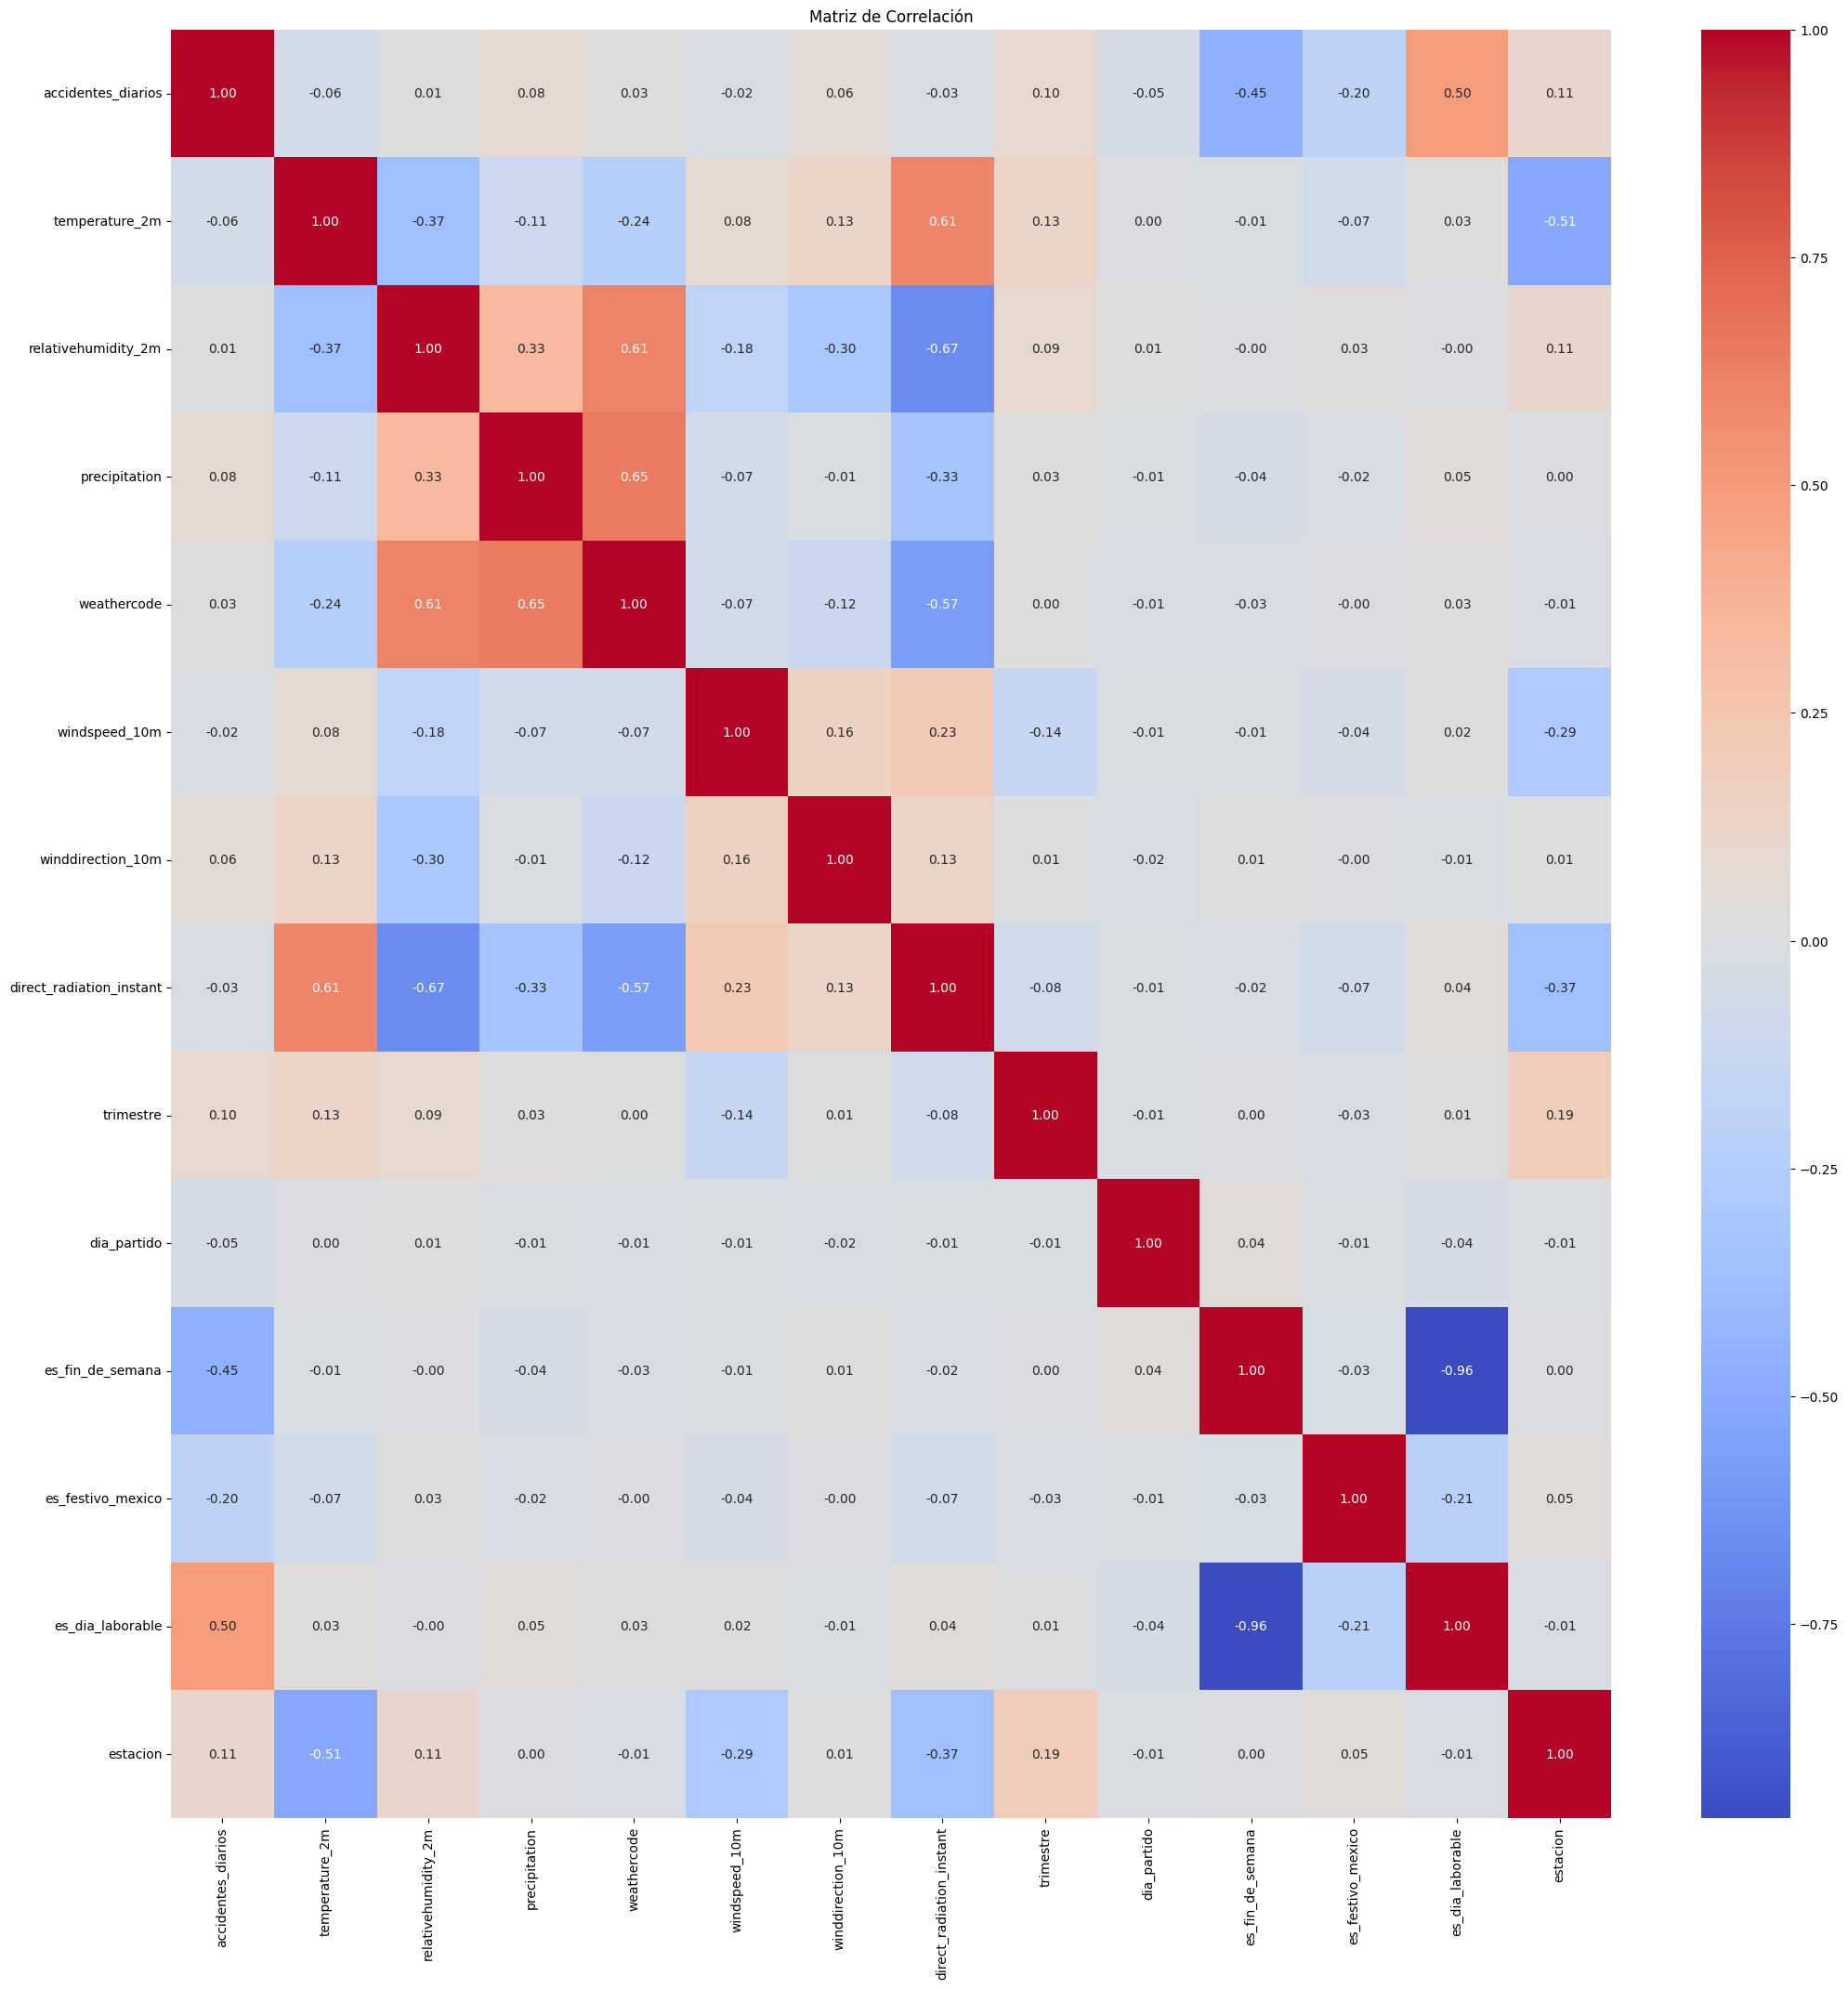

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
matriz_correlacion = agregacion_por_fecha_hora.corr()

# Crea un mapa de calor
plt.figure(figsize=(25, 25))  # Tamaño del gráfico
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")  # 'annot' agrega los valores en cada celda, 'cmap' elige el esquema de colores, 'fmt' define el formato de los valores

# Configura el título del gráfico
plt.title('Matriz de Correlación')

# Muestra el gráfico
plt.show()


# Interpretaciones
Accidentes Diarios vs. Días de la Semana:

Los accidentes diarios tienen una correlación cercana a 0.5 con la variable "es_dia_laborable", lo que indica una relación positiva significativa. Esto sugiere que el número de accidentes tiende a ser mayor en días laborables.
Además, los accidentes diarios muestran una correlación negativa (cercana a -0.45) con la variable "es_fin_de_semana". Esto sugiere que los fines de semana tienden a tener menos accidentes en comparación con los días laborables.

Me centraré en estas interpretaciones específicas, ya que las demás suelen ser evidentes dado que ambas variables están relacionadas con el clima.

# Pruebas de hipótesis

In [42]:
import pandas as pd
import numpy as np
from scipy.stats import kstest, poisson

# Calcula la media de los datos
media_muestral = datos.mean()

# Realiza la prueba de Kolmogorov-Smirnov para comprobar si los datos siguen una distribución Poisson
ks_statistic, ks_p_value = kstest(datos, 'poisson', args=(media_muestral,))

# Establece un nivel de significancia (alfa)
alfa = 0.05

# Compara el p-valor con el nivel de significancia
if ks_p_value < alfa:
    print("Rechazamos la hipótesis nula. Los datos no siguen una distribución Poisson.")
else:
    print("No podemos rechazar la hipótesis nula. Los datos podrían seguir una distribución Poisson.")

# Imprime el resultado del test de Kolmogorov-Smirnov
print("Estadístico KS:", ks_statistic)
print("P-valor:", ks_p_value)

Rechazamos la hipótesis nula. Los datos no siguen una distribución Poisson.
Estadístico KS: 0.25870534457159133
P-valor: 5.401081271305741e-128


# Presenta tus resultados gráficamente

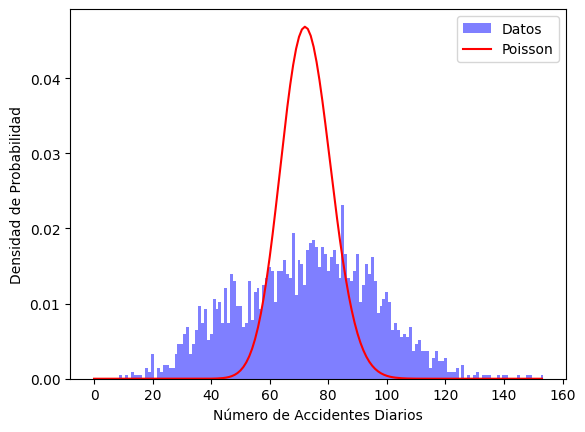

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson


# Crea un rango para el histograma
bin_edges = np.arange(0, max(datos) + 1.5) - 0.5

# Genera el histograma de tus datos
plt.hist(datos, bins=bin_edges, density=True, alpha=0.5, color='blue', label='Datos')

# Crea un rango para la distribución Poisson
rango_poisson = np.arange(0, max(datos) + 1)

# Calcula las probabilidades teóricas de la distribución Poisson
probabilidades_poisson = poisson.pmf(rango_poisson, media_muestral)

# Dibuja la línea de la distribución Poisson
plt.plot(rango_poisson, probabilidades_poisson, 'r-', label='Poisson')

# Agrega etiquetas y leyenda
plt.xlabel('Número de Accidentes Diarios')
plt.ylabel('Densidad de Probabilidad')
plt.legend()

# Muestra el gráfico
plt.show()
